In [1]:
import cv2

In [2]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

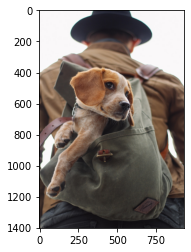

In [5]:
plt.imshow(img1)

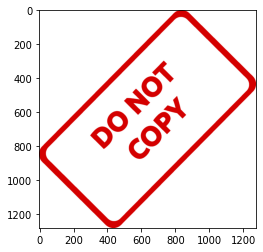

In [6]:
plt.imshow(img2)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
img2.shape

(1280, 1277, 3)

## Blending images of the same size

In [9]:
# Resizing images

img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

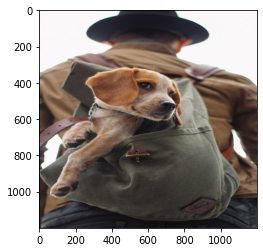

In [10]:
plt.imshow(img1)

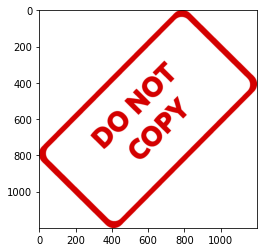

In [11]:
plt.imshow(img2)

In [12]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

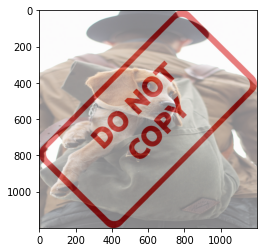

In [13]:
plt.imshow(blended)

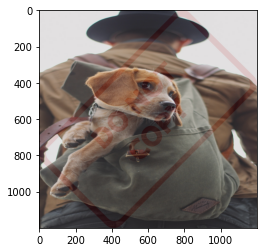

In [14]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)
plt.imshow(blended)

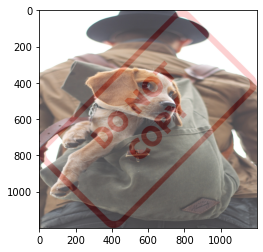

In [15]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=10)
plt.imshow(blended)

## Overlay small image on top of a larger image (No Blending)

In [16]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

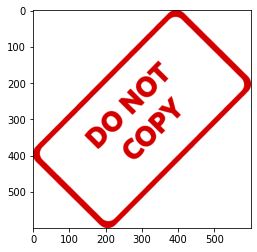

In [19]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

In [20]:
large_img = img1
small_img = img2

In [21]:
x_offset = 0
y_offset = 0

In [22]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [23]:
large_img[y_offset: y_end, x_offset: x_end] = small_img

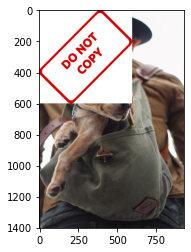

In [24]:
plt.imshow(large_img)

## Blend together images of different sizes

In [25]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

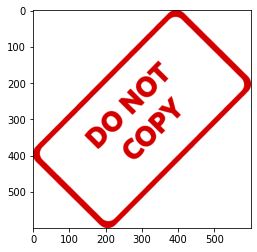

In [26]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

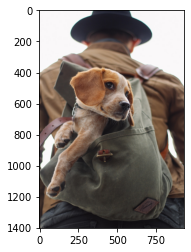

In [27]:
plt.imshow(img1)

In [28]:
# Choose where you want to blend the small image on to (Region of interest)

img1.shape

(1401, 934, 3)

In [29]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [30]:
img2.shape

(600, 600, 3)

In [31]:
rows, cols, channels = img2.shape

In [32]:
rows

600

In [33]:
cols

600

In [34]:
channels

3

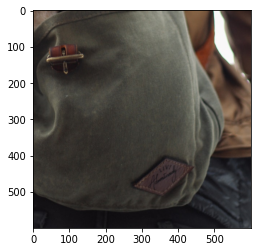

In [35]:
roi = img1[y_offset:1401, x_offset:943]
plt.imshow(roi)

In [36]:
# Create a mask (Picking only the red part of the do not copy)
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

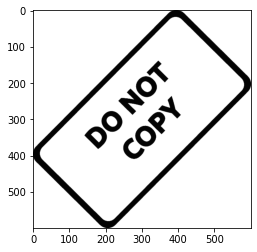

In [37]:
plt.imshow(img2gray, cmap='gray')

In [38]:
mask_inv = cv2.bitwise_not(img2gray)

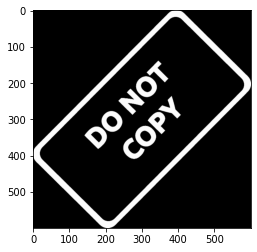

In [39]:
plt.imshow(mask_inv, cmap='gray')

In [40]:
mask_inv.shape

(600, 600)

In [41]:
# Add back color channel

In [42]:
import numpy as np

In [43]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [44]:
white_background.shape

(600, 600, 3)

In [45]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [46]:
bk.shape

(600, 600, 3)

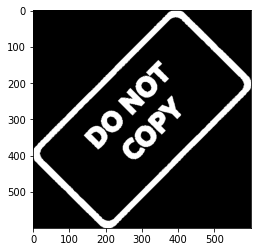

In [47]:
plt.imshow(bk)

In [48]:
bk.shape

(600, 600, 3)

In [49]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

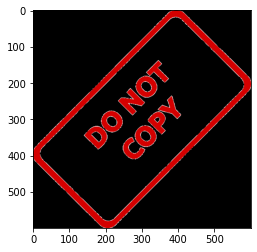

In [50]:
plt.imshow(fg)

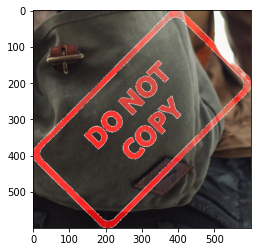

In [51]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [52]:
large_img = img1
small_img = final_roi

In [55]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset: x_offset + small_img.shape[1]] = small_img

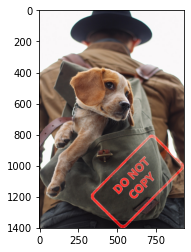

In [56]:
plt.imshow(large_img)